In [171]:
# import libraries
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re


from pathlib import Path

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# load in directories
from experiment_code.constants import Defaults

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
#PREPROCESS_PILOT
#load in task data from gorilla
df1 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_task_v8_v1sheet.csv"))
df2 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_task_v9_v2sheet.csv"))
df3 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_task_v11_v1sheet.csv"))
df4 = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_task_v12_v2sheet.csv"))

#load in english data from gorilla
df1_english = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_english_v8.csv"))
df2_english = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_english_v9.csv"))
df3_english = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_english_v11.csv"))
df4_english = pd.read_csv(os.path.join(Defaults.RAW_DIR, "prepilot_english_v12.csv"))

In [173]:
# merge task dataframes

df = df1.append([df2, df3, df4])
#df_v1 = df1.append(df2)
#df_v2 = df3.append(df4)
#df_sheet1 = df1.append(df3)
#df_sheet2 = df2.append(df4)
df_english = df1_english.append([df2_english, df3_english, df4_english])

## Clean data

In [174]:
# filter dataframe to remove redundant cols
df_filtered = df.filter({'Experiment ID', 'Experiment Version', 'Task Version','Participant Private ID', 'Spreadsheet Name', 'Spreadsheet Row', 'Zone Type', 'Reaction Time', 'Response', 'Correct', 'Incorrect', 'display', 'full_sentence', 
                        'last_word', 'sampled', 'target_word','random_word','ANSWER', 'cloze_probability', 'CoRT_mean', 'condition', 'sampled'})

In [175]:
#rename some columns
df_filtered = df_filtered.rename({'Zone Type':'zone_type', 'Reaction Time':'reaction_time','Spreadsheet Row': 'sentence_num','Participant Private ID':'participant_ID', 'Experiment ID':'experiment_id', 'Task Version':'task_version', 
                    'Experiment Version':'experiment_version', 'Spreadsheet Name':'spreadsheet_version', 'ANSWER':'answer', 'Correct':'correct', 'Response':'response', 'Incorrect':'incorrect'}, axis=1)

In [199]:
# ***select desired rows
#desired_rows = {"response_keyboard_single", "timelimit_screen?"}
df_filtered = df_filtered.query('zone_type=="response_keyboard_single"')
df_filtered

,task_version,sentence_num,full_sentence,incorrect,answer,zone_type,cloze_probability,response,participant_ID,CoRT_mean,...,experiment_version,experiment_id,display,condition,last_word,target_word,random_word,correct,spreadsheet_version,reaction_time
10,10.0,1.0,NaN,0.0,NaN,response_keyboard_single,NaN,True,1390018.0,NaN,...,8.0,17283.0,instructions,NaN,NaN,NaN,NaN,1.0,Spreadsheet V1,1405.055
18,10.0,1.0,NaN,0.0,NaN,response_keyboard_single,NaN,False,1390018.0,NaN,...,8.0,17283.0,instructions,NaN,NaN,NaN,NaN,1.0,Spreadsheet V1,1061.105
36,10.0,1.0,NaN,1.0,NaN,response_keyboard_single,NaN,False,1390018.0,NaN,...,8.0,17283.0,instructions,NaN,NaN,NaN,NaN,0.0,Spreadsheet V1,899.080
52,10.0,2.0,The|museum|curator|placed|the|sculpture|back|i...,0.0,True,response_keyboard_single,0.52,True,1390018.0,4.6,...,8.0,17283.0,trial,CoRT,place,place,boo,1.0,Spreadsheet V1,693.645
64,10.0,3.0,The|enemies|stormed|the|castle|despite|the|pro...,0.0,True,response_keyboard_single,0.39,True,1390018.0,4.5,...,8.0,17283.0,trial,CoRT,moat,moat,read,1.0,Spreadsheet V1,669.850
77,10.0,4.0,Jen's|love|for|children|and|school|convinced|h...,0.0,True,response_keyboard_single,0.89,True,1390018.0,1.1666666666666667,...,8.0,17283.0,trial,non-CoRT,teach,teach,teach,1.0,Spreadsheet V1,789.640
90,10.0,5.0,Everyone|ran|from|the|man|like|he|was|a,0.0,True,response_keyboard_single,0.31,True,1390018.0,4.8,...,8.0,17283.0,trial,CoRT,monster,monster,whale,1.0,Spreadsheet V1,764.380
102,10.0,6.0,Frank|read|by|the|fireplace|while|his|grandmother,0.0,True,response_keyboard_single,0.4,True,1390018.0,4.4,...,8.0,17283.0,trial,CoRT,knitted,knitted,charge,1.0,Spreadsheet V1,865.160
113,10.0,7.0,Little|Amelia's|favorite|toy|was|her|hula,0.0,True,response_keyboard_single,0.99,True,1390018.0,1.6,...,8.0,17283.0,trial,non-CoRT,hoop,hoop,roof,1.0,Spreadsheet V1,574.905
124,10.0,8.0,Andrew's|favorite|type|of|fruit|is|the,0.0,True,response_keyboard_single,0.31,True,1390018.0,1.6666666666666667,...,8.0,17283.0,trial,non-CoRT,apple,apple,tongue,1.0,Spreadsheet V1,792.945


## Visualizations - all responses

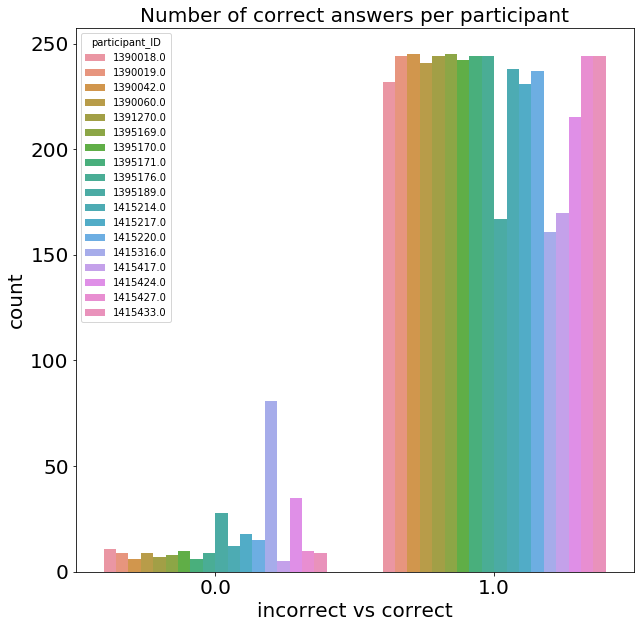

In [177]:
# ***distribution_of_correct_per_participant
# note: NA are counted as 0
df_filtered.participant_ID.unique()

plt.figure(figsize=(10,10));
sns.countplot(x='correct', hue='participant_ID', data= df_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers per participant', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

Answers mean: 0.9341864716636198


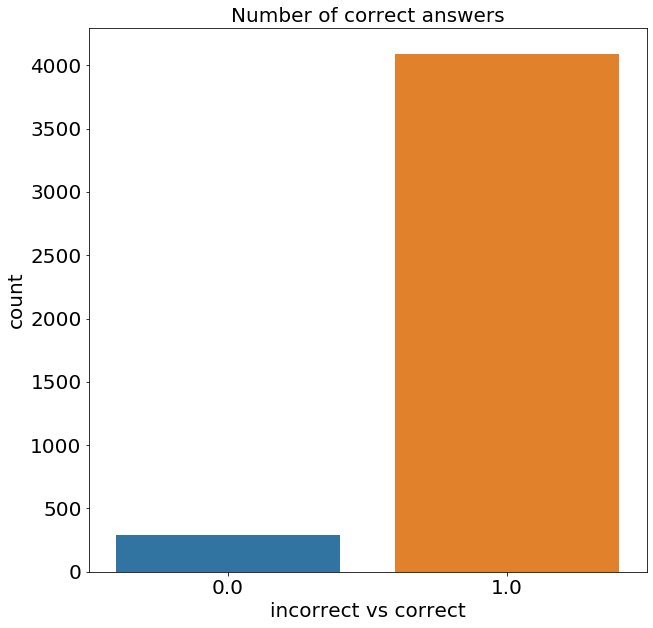

In [205]:
# distribution_of_correct
# note: NA are counted as 0

plt.figure(figsize=(10,10));
sns.countplot(x='correct', data= df_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
print('Answers mean:', df_filtered.correct.mean())
#print('Percentage of correct vs incorrect',df_filtered['correct'].value_counts(normalize=True) * 100)

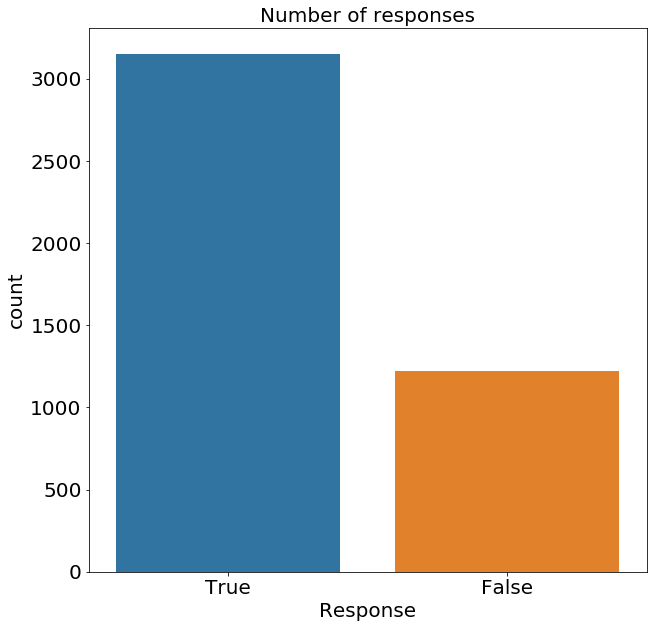

In [179]:
# distribution_of_responses (add NA later)
plt.figure(figsize=(10,10));
sns.countplot(x='response', data= df_filtered);
plt.xlabel('Response', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of responses', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);

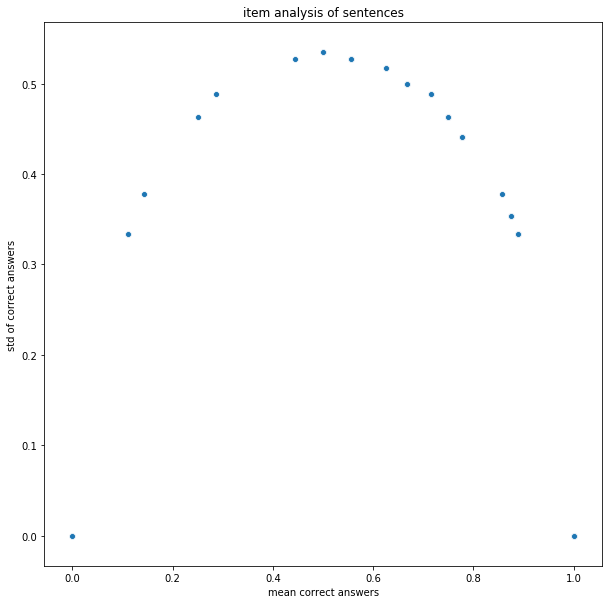

NameError: name 'num' is not defined

In [207]:
plt.figure(figsize=(10,10))
sns.scatterplot(df_filtered.groupby('full_sentence')['correct'].mean(), df_filtered.groupby('full_sentence')['correct'].std())
plt.xlabel('mean correct answers')
plt.ylabel('std of correct answers')
plt.title('item analysis of sentences')
plt.show()
#df_filtered.groupby('full_sentence').groups

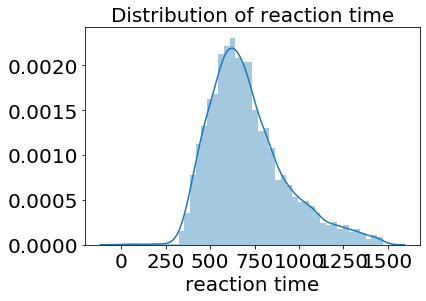

RT mean: 709.3104924589477


In [202]:
#RT_distribution
sns.distplot(df_filtered['reaction_time'])
plt.xlabel('reaction time', fontsize=20)
plt.title('Distribution of reaction time', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()
print('RT mean:', df_filtered.reaction_time.mean())

## Visualizations - grouped by sentence

In [195]:
# group sentences and find mean and standard deviation for each
df_by_sentence = df_filtered.groupby(['full_sentence', 'cloze_probability', 'CoRT_mean', 'condition','last_word','answer','target_word','random_word']).agg({'correct': ['mean', 'std']}).reset_index()
# join multilevel columns
df_by_sentence.columns = ["_".join(pair) for pair in df_by_sentence.columns]
df_by_sentence.columns = df_by_sentence.columns.str.strip('_')

In [183]:
#some basic statistics for sentences
print('mean of correct responses', df_by_sentence.correct_mean.mean())
print('sd of correct responses', df_by_sentence.correct_std.mean())
print('max of correct responses', df_by_sentence.correct_mean.max())
print('min of correct responses', df_by_sentence.correct_mean.min())

mean of correct responses 0.9358015873015872
sd of correct responses 0.12673048015061825
max of correct responses 1.0
min of correct responses 0.0


In [211]:
df_by_sentence.loc[df_by_sentence['correct_mean']<=0.5]

,full_sentence,cloze_probability,CoRT_mean,condition,last_word,answer,target_word,random_word,correct_mean,correct_std
5,"After|college,|the|student|had|amassed|a|lot|of",0.76,1.8,non-CoRT,cake,False,debt,cake,0.500000,0.534522
72,Courtney|was|so|happy|and|relieved|she|started|to,0.71,4.333333333333333,CoRT,laugh,False,cry,laugh,0.111111,0.333333
106,"Hearing|noises|from|above,|the|confused|man|in...",0.32,4.5,CoRT,art,False,attic,art,0.500000,0.534522
202,Mark's|favorite|spot|to|fish|was|a|pier|by|the,0.34,4.4,CoRT,rocks,False,lake,rocks,0.111111,0.333333
212,Mike|exited|the|shower|and|quickly|put|on|his,0.44,4.8,CoRT,suit,False,robe,suit,0.000000,0.000000
230,"On|his|lunch|break,|the",0.87,1.6,non-CoRT,lunchsign,True,lunchsign,bridge,0.250000,0.462910
234,"Over|the|summer,|Tyler|wanted|something|to",0.77,1.25,non-CoRT,sail,False,do,sail,0.444444,0.527046
304,The|big|friendly|dog|wetted|her|face|with|his,0.7,4.5,CoRT,touch,False,tongue,touch,0.142857,0.377964
377,The|lion|wasn't,0.86,1.4,non-CoRT,fullcub,True,fullcub,rent,0.000000,0.000000
464,"To|get|rid|of|emotional|clutter,|Will|resolved|to",0.38,1.8,non-CoRT,eat,False,meditate,eat,0.285714,0.487950


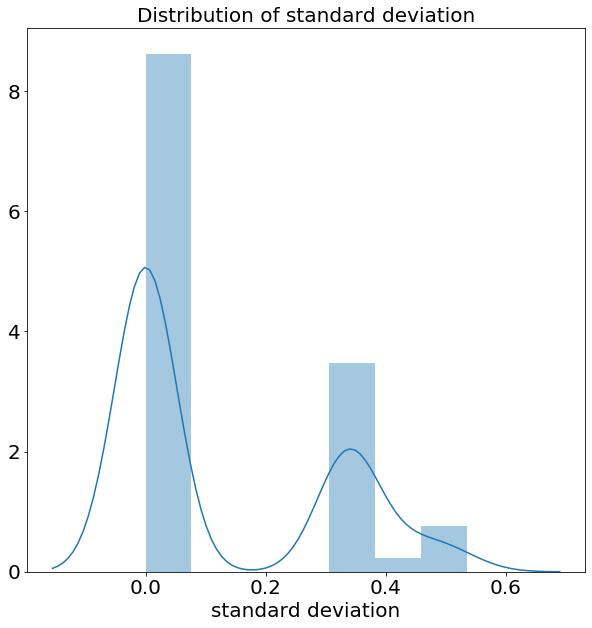

In [185]:
# correct_standard_deviation
plt.figure(figsize=(10,10))

sns.distplot(df_by_sentence['correct_std'])
plt.xlabel('standard deviation', fontsize=20)
plt.title('Distribution of standard deviation', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

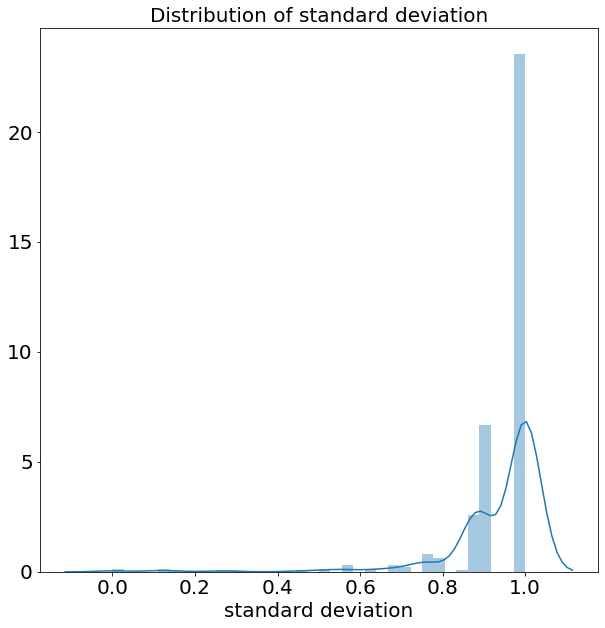

In [186]:
# correct_mean_distribution
plt.figure(figsize=(10,10))

sns.distplot(df_by_sentence['correct_mean'])
plt.xlabel('standard deviation', fontsize=20)
plt.title('Distribution of standard deviation', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);
plt.show()

## Extra: english data analyzation

In [188]:
# filter dataframe to remove redundant cols
df_english_filtered = df_english.filter({'Experiment ID', 'Experiment Version', 'Participant Private ID', 'Spreadsheet Row', 'Zone Type', 'Reaction Time', 'Correct', 'Incorrect', 
                                        'display', 'response', 'type', 'item'})

In [189]:
# rename some columns
df_english_filtered = df_english_filtered.rename({'Experiment ID':'experiment_ID', 'Experiment Version':'experiment_version', 'Participant Private ID':'participant_ID', 'Spreadsheet Row': 'sentence_num', 'Zone Type':'zone_type', 'Reaction Time':'reaction_time', 
                                                  'Correct':'correct', 'Incorrect':'incorrect'}, axis=1)

In [194]:
# select desired rows
df_english_filtered = df_english_filtered.query('zone_type == "response_keyboard"')

In [197]:
# percentage of correct vs incorrect
df_english_filtered['correct'].value_counts(normalize=True) * 100

1.0    90.189019
0.0     9.810981
Name: correct, dtype: float64

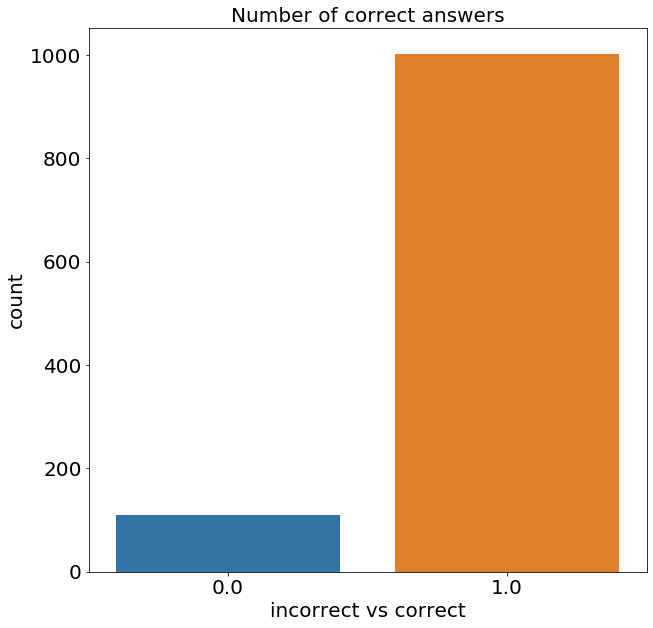

In [192]:
# distribution_of_correct_english
# note: NA are counted as 0

plt.figure(figsize=(10,10));
sns.countplot(x='correct', data= df_english_filtered);
plt.xlabel('incorrect vs correct', fontsize=20)
plt.ylabel('count', fontsize=20)
plt.title('Number of correct answers', fontsize=20);
plt.xticks(fontsize=20)
plt.yticks(fontsize=20);